# <b>Template Matching in OpenCV</b>

## Making the necessary imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the reference and template images

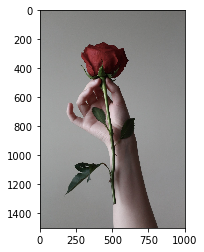

In [2]:
img = cv2.imread('rose.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img.shape

(1500, 1000, 3)

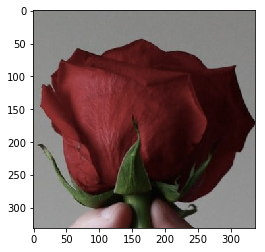

In [4]:
template = cv2.imread('temp.jpeg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template)

In [5]:
template.shape

(331, 337, 3)

## All the different comparison methods in OpenCV

In [6]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

## Comparison based observation on how the different methods give results 

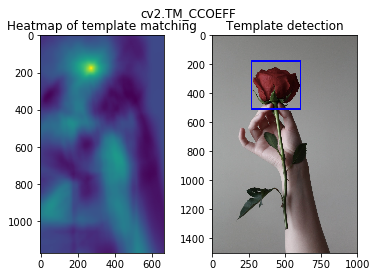

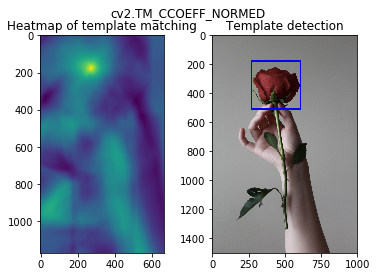

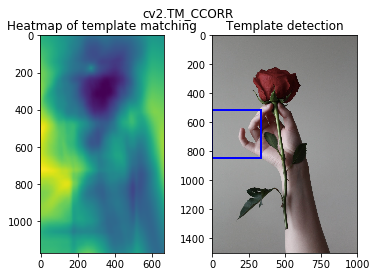

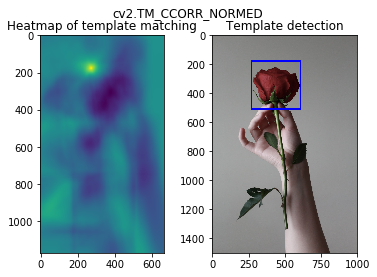

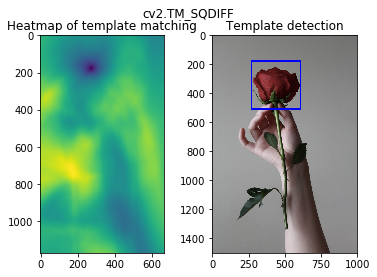

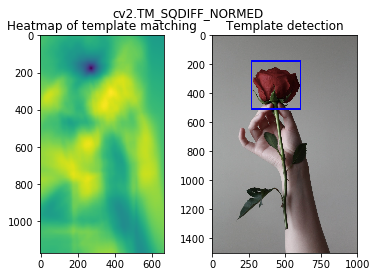

In [7]:
for m in methods:
    img_copy = img.copy()
    
    # Iterating over the methods list
    method = eval(m)
    
    # Using matchTemplate method which compares the template by sliding over the image
    res = cv2.matchTemplate(img, template, method)
    
    # Finding the minimum and maximum value of the resultant image
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # For these 2 methods, we get the matches at minimum value points
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    h, w, clr = template.shape
    bottom_right = (top_left[0]+w, top_left[1]+h)
    
    # Drawing a rectangle to denote the matches
    cv2.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 10)
    
    # Representing the images for comparison
    plt.subplot(121) 
    plt.imshow(res)
    plt.title('Heatmap of template matching')
    
    plt.subplot(122)
    plt.imshow(img_copy)
    plt.title('Template detection')
    
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')